# Calibrating ensemble models with Bayesian binning

### Bayes theorem for calibrating binary classification models

Assuming that we know the predictions of an ensemble model trained to predict a binary variable Y={0,1} and its prior probability P(Y=1) which is the probability for the event Y=1, we can use the *Bayesian* theorem to compute the calibrated prediction or posterior probability of the model.

$$ P(Y=1|Prediction) = \frac{P(Prediction|Y=1)\cdot P(Y=1)}{P(Prediction|Y=1)\cdot P(Y=1)+P(Prediction|Y=0)\cdot P(Y=0)} $$

*Note:* More information about *Bayes* theorem explained in the paper *Handmade_Naive_Bayes.pdf* from the repository *Coding-Machine-Learning-algorithms-from-scratch-in-R .*

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the ensemble model predictions

Import the predictions of the ensemble model and the true label (binary in this case) for each observation in a *validation* dataset (not used for training the model).

In [2]:
data = pd.read_excel('Ensemble model predictions in validation dataset.xlsx')
prediction = data["Prediction"]
true_label = data["True_Label"]
data.head()

,True_Label,Prediction
0,0,0.004622
1,0,0.261871
2,1,0.025343
3,0,0.194241
4,0,0.007017


The prediction range of the ensemble model is [0,1] equivalent to the theoretical range of probability for the event Y=1. However, the model is not calibrated as we will see in the following plot because, for example, the bin with predicted value between [0.9-1] has not a 90-100% of positive true labels.

In [3]:
min(prediction), max(prediction)

(2.0520697034953628e-06, 0.9992258548736572)

### Prior probabilities

Compute the prior probability for the event Y=1 and Y=0. You can see that the *validation* dataset is unbalanced, which means that the % of Y=1 is different from 50%.

In [4]:
p1 = np.mean(true_label)
p0 = 1-p1
p1, p0

(0.2373748862602366, 0.7626251137397634)

### Bins

For binning the prediction in groups, create the bins as equally spaced predicted value limits over the range of the predictions.

In [5]:
bins = np.linspace(0, 1, 11)
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Conditional distributions by binning predictions

Compute the frequeny distribution of predictions with positive true label by bins equivalent to P(Prediction|Y=1) in the initial formula.

In [6]:
binned_prediction_given1 = np.histogram(prediction[true_label==1], bins)[0]/sum(true_label==1)
binned_prediction_given1

array([0.4657403 , 0.10541447, 0.08001917, 0.04743651, 0.04695736,
       0.04551989, 0.04264494, 0.0431241 , 0.05366555, 0.06947772])

Compute the frequency distribution of predictions with negative true label by bins equivalent to P(Prediction|Y=0) in the initial formula.

In [7]:
binned_prediction_given0 = np.histogram(prediction[true_label==0], bins)[0]/sum(true_label==0)
binned_prediction_given0

array([0.78434004, 0.08337062, 0.03609247, 0.02296793, 0.02102908,
       0.01357196, 0.01282625, 0.00999254, 0.00745712, 0.00835198])

Check that both conditional distributions sum 1.

In [8]:
sum(binned_prediction_given1), sum(binned_prediction_given0)

(0.9999999999999999, 1.0)

### Calibrated predictions

Compute the calibrated prediction or posterior probability by bins equivalent to P(Y=1|Prediction).

In [9]:
calibrated_binned_prediction = (p1*binned_prediction_given1)/(p1*binned_prediction_given1+p0*binned_prediction_given0)
calibrated_binned_prediction

array([0.15599422, 0.28241335, 0.40831296, 0.39130435, 0.41004184,
       0.51075269, 0.50857143, 0.57324841, 0.69135802, 0.72139303])

### Let's plot the distributions

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

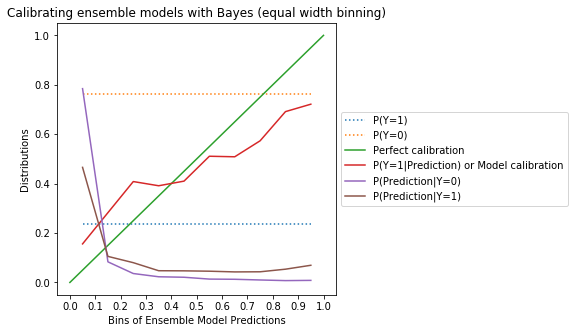

In [11]:
plt.figure(figsize=(5,5))
plt.plot(bins[1:]-0.05, np.repeat(p1, bins.shape[0]-1), label='P(Y=1)', linestyle=":")
plt.plot(bins[1:]-0.05, np.repeat(p0, bins.shape[0]-1), label='P(Y=0)', linestyle=":")
plt.plot([0,1], [0,1], label="Perfect calibration")
plt.plot(bins[1:]-0.05, calibrated_binned_prediction, label='P(Y=1|Prediction) or Model calibration')
plt.plot(bins[1:]-0.05, binned_prediction_given0, label='P(Prediction|Y=0)')
plt.plot(bins[1:]-0.05, binned_prediction_given1, label='P(Prediction|Y=1)')
plt.xticks(bins)
plt.xlabel("Bins of Ensemble Model Predictions")
plt.ylabel("Distributions")
plt.title('Calibrating ensemble models with Bayes (equal width binning)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))